# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline

import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [2]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

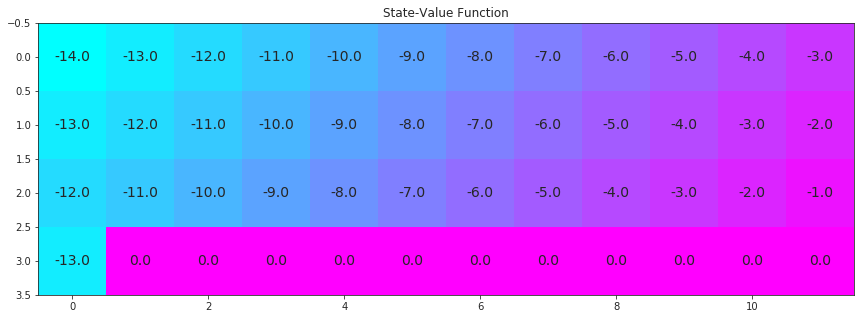

In [4]:
# define the optimal state-value function
# Note that Udacity's original code in this cell had some errors which I have corrected
# compare this cell to that in the solution notebook to see that difference between 
# Udacity's code and my code
V_opt = np.zeros((4,12))
V_opt[0] = -np.arange(3, 15)[::-1]
V_opt[1] = -np.arange(3, 15)[::-1] + 1
V_opt[2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [5]:
def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        
        ## TODO: complete the function
        
        # play for a single episode
        # during the episode, update the Q-table using SARSA
        epsilon = 1.0/i_episode # probability of exploration vs exploitation 
        #epsilon = max(1.0/i_episode, 0.1) 
        # In this problem, some how not letting the exploration rate approach 0 
        # causes the optimal policy to not be found 
        Q = SARSA_episode(env, alpha, gamma, Q, epsilon)
        
    return Q

In [6]:
# function to play a single episode episode following the SARSA algo. to update the Qtable
def SARSA_episode(env, alpha, gamma, Q, epsilon):
    state = env.reset()
    num_actions = env.nA
    action = Action(Q, state, epsilon, num_actions)
    while True:
        # action for the current time step
        next_state, reward, done, info = env.step(action) 
        # action for the state in the next time step
        next_action = Action(Q, next_state, epsilon, num_actions)
        # update Q
        estimated_return = reward + gamma*Q[next_state][next_action]
        Q[state][action] += alpha*(estimated_return - Q[state][action]) 
        state = next_state
        # note that, in the next state, we have to follow the same action as 
        # was used to estimate the discounted rewards for the current state-action pair i.e.
        action = next_action 
        if done:
            break
    return Q        

In [7]:
# function to choose an action in epsilon-greedy manner from the Qtable
def Action(Q, state, epsilon, num_actions):
    qmax = Q[state].max()
    max_actions = np.ravel(np.argwhere(Q[state] == qmax)) # actions with max. q-value
    
    exploit = np.random.choice(2, p = [epsilon, 1 - epsilon])
    
    if exploit == 1:
        action = np.random.choice(max_actions)
        return action
    else:
        action = np.random.choice(num_actions)
        return action
    

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 6000/6000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  2  1  3  1  1  3]
 [ 0  0  0  1  1  1  2  2  2  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


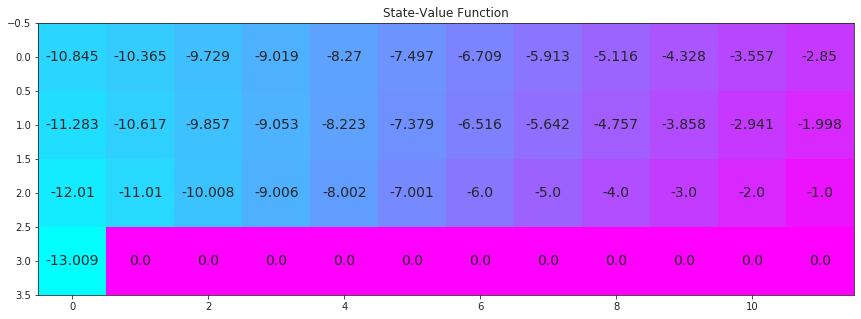

In [8]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 6000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

<font color = green> Note that Q-learning is another name for SARSA-max. </font>

In [11]:
def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        
        # play for a single episode
        # during the episode, update the Q-table using SARSA
        epsilon = 1.0/i_episode # probability of exploration vs exploitation 
        #epsilon = max(1.0/i_episode, 0.1) 
        # In this problem, some how not letting the exploration rate approach 0 
        # causes the optimal policy to not be found 
        Q = SARSA_MAX_episode(env, alpha, gamma, Q, epsilon)
        
    return Q

In [14]:
# function to play a sinle episode and update Q using SARSA_max
def SARSA_MAX_episode(env, alpha, gamma, Q, epsilon):
    state = env.reset()
    num_actions = env.nA
    while True:
        action = Action(Q, state, epsilon, num_actions) # reusing the action function of part 1
        next_state, reward, done, info = env.step(action)
        # update Qtable
        estimated_q = reward + gamma*Q[next_state].max()
        Q[state][action]+=alpha*(estimated_q - Q[state][action])
        state = next_state
        if done:
            break
    return Q        

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  1  0  1  1  2  1  0  1  2  1  2]
 [ 1  2  1  1  1  1  3  1  0  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


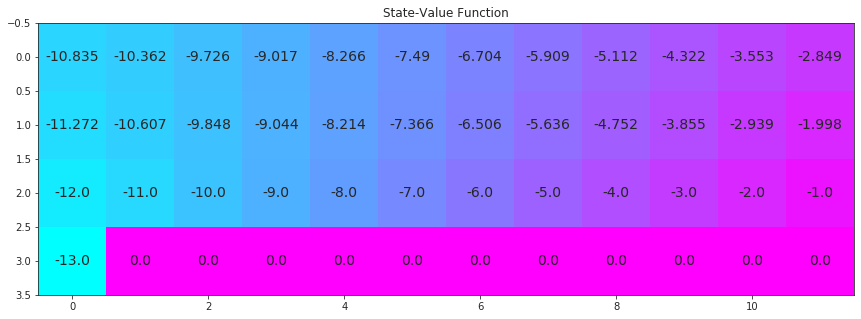

In [15]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [27]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(env.nA))
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        # play for a single episode
        # during the episode, update the Q-table using SARSA
        epsilon = 1.0/i_episode # probability of exploration vs exploitation 
        #epsilon = max(1.0/i_episode, 0.1) 
        # In this problem, some how not letting the exploration rate approach 0 
        # causes the optimal policy to not be found 
        Q = expected_SARSA_episode(env, alpha, gamma, Q, epsilon)
        
    return Q

In [43]:
# function to play a single episode and update Q using expected_SARSA
def expected_SARSA_episode(env, alpha, gamma, Q, epsilon):
    state = env.reset()
    num_actions = env.nA
    while True:
        action = Action(Q, state, epsilon, num_actions) # reusing the action function of part 1
        next_state, reward, done, info = env.step(action)
        # update Qtable
        estimated_q = Expected_Q(reward, Q, next_state, gamma, epsilon) # function to compute the expected Q
        Q[state][action]+=alpha*(estimated_q - Q[state][action])
        state = next_state
        if done:
            break
    return Q        

In [44]:
# function to compute the expected Qvalue based on an epsilon greedy policy
def Expected_Q(reward, Q, state, gamma, epsilon):
    qmax = Q[state].max()
    max_actions = np.ravel(np.argwhere(Q[state] == qmax))
    num_max_actions = max_actions.shape[0] # number of actions with maximum value
    num_actions = Q[state].shape[0]
    action_prob = np.zeros(num_actions) # probability to execute the various different actions
    action_prob[max_actions] = (1.0-epsilon)/num_max_actions # contribution to prob. due to exploitation
    action_prob+=epsilon/num_actions # contribution to prob. due to exploration
    
    expected_V = np.matmul(Q[state], action_prob)
    
    return reward + gamma*expected_V

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 10000/10000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 3  2  1  3  1  1  1  1  2  2  2  0]
 [ 1  0  2  0  0  1  2  1  2  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


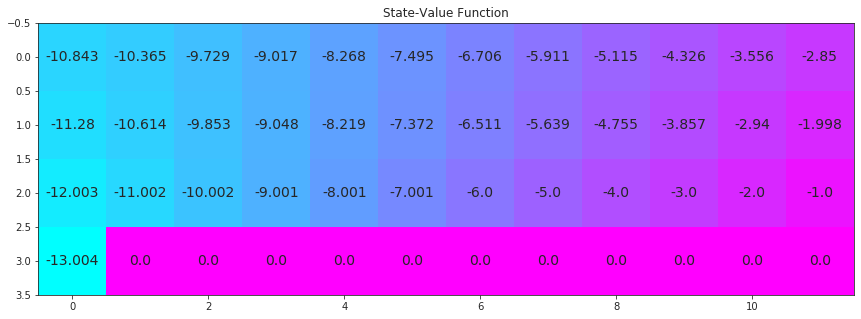

In [50]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 0.01)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])